# PBMC SYMPHONY INTO KIDNEY CELLS
## SID GURAJALA
## 07/15/2024

In [55]:
library(symphony)
library(dplyr)
library(Matrix)
library(ggplot2)
library(viridis)
source("/data/srlab/anathan/scripts/scseq_utils.R")
set.seed(0)

run_or <- function(freq_table) {
    output_df <- data.frame()
    for (i in seq(1, nrow(freq_table))) {
        pred_level <-  freq_table[i, "cell_type_pred_knn"]
        annot_level <- freq_table[i, "annotation"]
        iter_res <- or(pred_level, annot_level, freq_table)
        output_df <- output_df %>% rbind(iter_res)
    }
    colnames(output_df) <- c("cell_type_pred_knn", "annotation", "OR", "pvalue", "log_OR")
    return(output_df)
}
or <- function(pred_level, annot_level, freq_table) {
    inAandB <- freq_table %>% filter(annotation == annot_level, 
        cell_type_pred_knn == pred_level) %>% pull(Freq) %>% 
        sum()
    inAnotB <- freq_table %>% filter(annotation == annot_level, 
        cell_type_pred_knn != pred_level) %>% pull(Freq) %>% 
        sum()
    inBnotA <- freq_table %>% filter(annotation != annot_level, 
        cell_type_pred_knn == pred_level) %>% pull(Freq) %>% 
        sum()
    notBnotA <- freq_table %>% filter(annotation != annot_level, 
        cell_type_pred_knn != pred_level) %>% pull(Freq) %>% 
        sum()
    contin <- as.matrix(data.frame(c(inAandB, inAnotB), c(inBnotA, notBnotA)))
    fisher_res <- fisher.test(contin)
    chisq_res <- chisq.test(contin, correct = TRUE)
    res_df <- t(data.frame(c(pred_level, 
                           annot_level, 
                           fisher_res$estimate, 
                           chisq_res$p.value, 
                           log(fisher_res$estimate))))
    return(res_df)
} 

# T CELLS

In [2]:
tnk_reference <- readRDS('/data/srlab/ssg34/SLE_kidney_v2/data/symphony_materials/t_nk_kidney_symphony_reference_07162024.rds')
SLE_tnk_norm <- readRDS('/data/srlab/ssg34/SLE_pbmc_analysis/data/gene_expression/t_nk_qcd_seurat_sc_analysis_08252023.rds')[['RNA']]@data
SLE_tnk_meta <- readRDS('/data/srlab/ssg34/SLE_kidney_v2/data/pbmc/SLE_t_nk_pbmc_metadata_filtered_V0_cases_controls_07182024.rds')

In [3]:
tnk_query_meta <- SLE_tnk_meta[sample(nrow(SLE_tnk_meta), 30000), ]
tnk_query_norm <- SLE_tnk_norm[, tnk_query_meta$Cell]

In [4]:
query = mapQuery(tnk_query_norm,             # query gene expression (genes x cells)
                   tnk_query_meta,        # query metadata (cells x attributes)
                   tnk_reference,             # Symphony reference object
                   do_normalize = FALSE,  # perform log(CP10k+1) normalization on query
                   do_umap = FALSE)        # project query cells into reference UMAP

Scaling and synchronizing query gene expression

Found 5484 out of 5484 reference variable genes in query dataset

Project query cells using reference gene loadings

Clustering query cells to reference centroids

Correcting query batch effects

All done!



In [5]:
annotations <- data.frame(RNA_snn_res.1 = as.character(seq(0, 19)),
                          annotation = c("NK0. CD56dim CD16high FGFBP2high NK", 
                                         "T1. CD8+ GZMHhigh FGFBP2high",
                                         "T2. CD8+ GZMK+ CD74+ HLA-DR+",
                                         "T3. CD4+ IL7Rhigh VIMhigh",
                                         "T4. CD8+ MT-high",
                                         "NK5. CD56bright NEAT1high PRF1high NK",
                                         "NK6. CD56bright XCL2high IL2RBhigh NK",
                                         "T7. CD8+ GZMK+ TEMRA", 
                                         "T8. CD8+ Central Memory/Naive",
                                         "T9. CD4+ Effector Memory",
                                         "T10. CD4+ Central Memory/Naive", 
                                         "T11. TRDC+ Gamma/Delta",
                                         "T12. TRGC1+ Gamma/Delta", 
                                         "T13. CD4+ MAF+ IT2MA+ Effector Memory",
                                         "T14. CD8+ GZMK+ CD74high HLA-DRhigh",
                                         "T15. CD8+ GZMB+ DNMT1+ HELLS+ Proliferating",
                                         "T16. CD4+ T-reg",
                                         "T17. ISGhigh",
                                         "T18. CD8+ GZMB+ PCNAhigh Proliferating",
                                         "T19. CD8+ GZMB+ CENPFhigh Proliferating"))
#query$meta_data <- query$meta_data %>% left_join(annotations)

In [6]:
final_annotation = data.frame(new_cluster_number = seq(0, 21), 
                                           final_annotation = c("NK0. CD56dim NK",
                                                                 "T1. CD8+ GZMB+ CTL",
                                                                 "T2. CD8+ GZMB+ SYNE2bright CTL",
                                                                 "NK3. CD56bright NK",
                                                                 "T4. CENPF+ MKI67+ Proliferating",
                                                                 "T5. GZMK+ CD8+ NKG7high",
                                                                 "T6. GZMK+ CD8+ NKG7low",
                                                                 "T7. GZMK+ CD8+ Effector Memory",
                                                                 "T8. GZMK+ CD8+ NEAT1+",
                                                                 "T9. GZMK+ CD8+ Resident Memory",
                                                                 "T10. GZMK+ CD8+ ITGAE",
                                                                 "T11. CD4+ Effector Memory",
                                                                 "T12. CD8+ GMZK+ CD69+",
                                                                 "T13. CD4+ JUNlow Resident Memory",
                                                                 "T14. CD4+ JUNhigh Resident Memory",
                                                                 "T15. CD4+ S1PR1+ Central memory/Naive",
                                                                 "T16. KLRB1+ KIT+ ILC",
                                                                 "T17. CD4+ RORC+ CCR6+ Th17",
                                                                 "T18. CD4+ Central Memory/Naive",
                                                                 "T19. CD4+ IL2RA++ FOXP3++ Treg",
                                                                 "T20. CD4+ FOXP3+ Central Memory/Naive",
                                                                 "T21. CD4+ PDCD1+ CXCR5+ TFH/TPH"))
tnk_reference$meta_data <- tnk_reference$meta_data %>% left_join(final_annotation)

Joining, by = "new_cluster_number"


In [8]:
query = knnPredict(query, tnk_reference, tnk_reference$meta_data$final_annotation, k = 10)

In [9]:
query_meta <- query$meta_data %>% filter(cell_type_pred_knn_prob >= 0.8)
freq_table <- data.frame(table(query_meta$cell_type_pred_knn, query_meta$annotation))
colnames(freq_table) <- c("cell_type_pred_knn", "annotation", "Freq")
freq_table <- freq_table %>% mutate(cell_type_pred_knn = as.character(cell_type_pred_knn),
                                    annotation = as.character(annotation))

In [34]:
or_stats <- run_or(freq_table)
or_stats <- or_stats %>% 
                mutate(log_OR = ifelse(as.numeric(pvalue) < 0.01, 
                                       log_OR, NA))

Warning message in chisq.test(contin, correct = TRUE, simulate.p.value = TRUE, B = 10000):
“cannot compute simulated p-value with zero marginals”
Warning message in chisq.test(contin, correct = TRUE, simulate.p.value = TRUE, B = 10000):
“Chi-squared approximation may be incorrect”
Warning message in chisq.test(contin, correct = TRUE, simulate.p.value = TRUE, B = 10000):
“cannot compute simulated p-value with zero marginals”
Warning message in chisq.test(contin, correct = TRUE, simulate.p.value = TRUE, B = 10000):
“Chi-squared approximation may be incorrect”
Warning message in chisq.test(contin, correct = TRUE, simulate.p.value = TRUE, B = 10000):
“cannot compute simulated p-value with zero marginals”
Warning message in chisq.test(contin, correct = TRUE, simulate.p.value = TRUE, B = 10000):
“Chi-squared approximation may be incorrect”
Warning message in chisq.test(contin, correct = TRUE, simulate.p.value = TRUE, B = 10000):
“cannot compute simulated p-value with zero marginals”
Warning 

In [31]:
x_order <- c('NK0. CD56dim CD16high FGFBP2high NK',
             'NK5. CD56bright NEAT1high PRF1high NK',            
             'T1. CD8+ GZMHhigh FGFBP2high',
             'T14. CD8+ GZMK+ CD74high HLA-DRhigh',
             'T2. CD8+ GZMK+ CD74+ HLA-DR+',
             'T18. CD8+ GZMB+ PCNAhigh Proliferating',
             'T19. CD8+ GZMB+ CENPFhigh Proliferating',
             'T15. CD8+ GZMB+ DNMT1+ HELLS+ Proliferating',
             'NK6. CD56bright XCL2high IL2RBhigh NK',
             'T16. CD4+ T-reg',
             'T10. CD4+ Central Memory/Naive',
             'T8. CD8+ Central Memory/Naive',
             'T9. CD4+ Effector Memory',
             'T13. CD4+ MAF+ IT2MA+ Effector Memory',
             'T7. CD8+ GZMK+ TEMRA',
             'T12. TRGC1+ Gamma/Delta',
             'T11. TRDC+ Gamma/Delta',
             'T17. ISGhigh',
             'T3. CD4+ IL7Rhigh VIMhigh',
             'T4. CD8+ MT-high')

y_order <- c('NK0. CD56dim NK',
             'T1. CD8+ GZMB+ CTL',
             'T5. GZMK+ CD8+ NKG7high', 
             'T6. GZMK+ CD8+ NKG7low',
             'T4. CENPF+ MKI67+ Proliferating',
             'NK3. CD56bright NK',
             'T19. CD4+ IL2RA++ FOXP3++ Treg',
             'T20. CD4+ FOXP3+ Central Memory/Naive',
             "T11. CD4+ Effector Memory",
             'T18. CD4+ Central Memory/Naive',
             'T15. CD4+ S1PR1+ Central memory/Naive',
             'T13. CD4+ JUNlow Resident Memory',
             'T14. CD4+ JUNhigh Resident Memory',
             'T9. GZMK+ CD8+ Resident Memory',
             'T12. CD8+ GMZK+ CD69+',
             'T17. CD4+ RORC+ CCR6+ Th17',
             'T2. CD8+ GZMB+ SYNE2bright CTL',
             'T7. GZMK+ CD8+ Effector Memory',
             'T8. GZMK+ CD8+ NEAT1+',
             'T10. GZMK+ CD8+ ITGAE'
             
)
y_order <- c(y_order, final_annotation$final_annotation[!final_annotation$final_annotation %in% y_order])

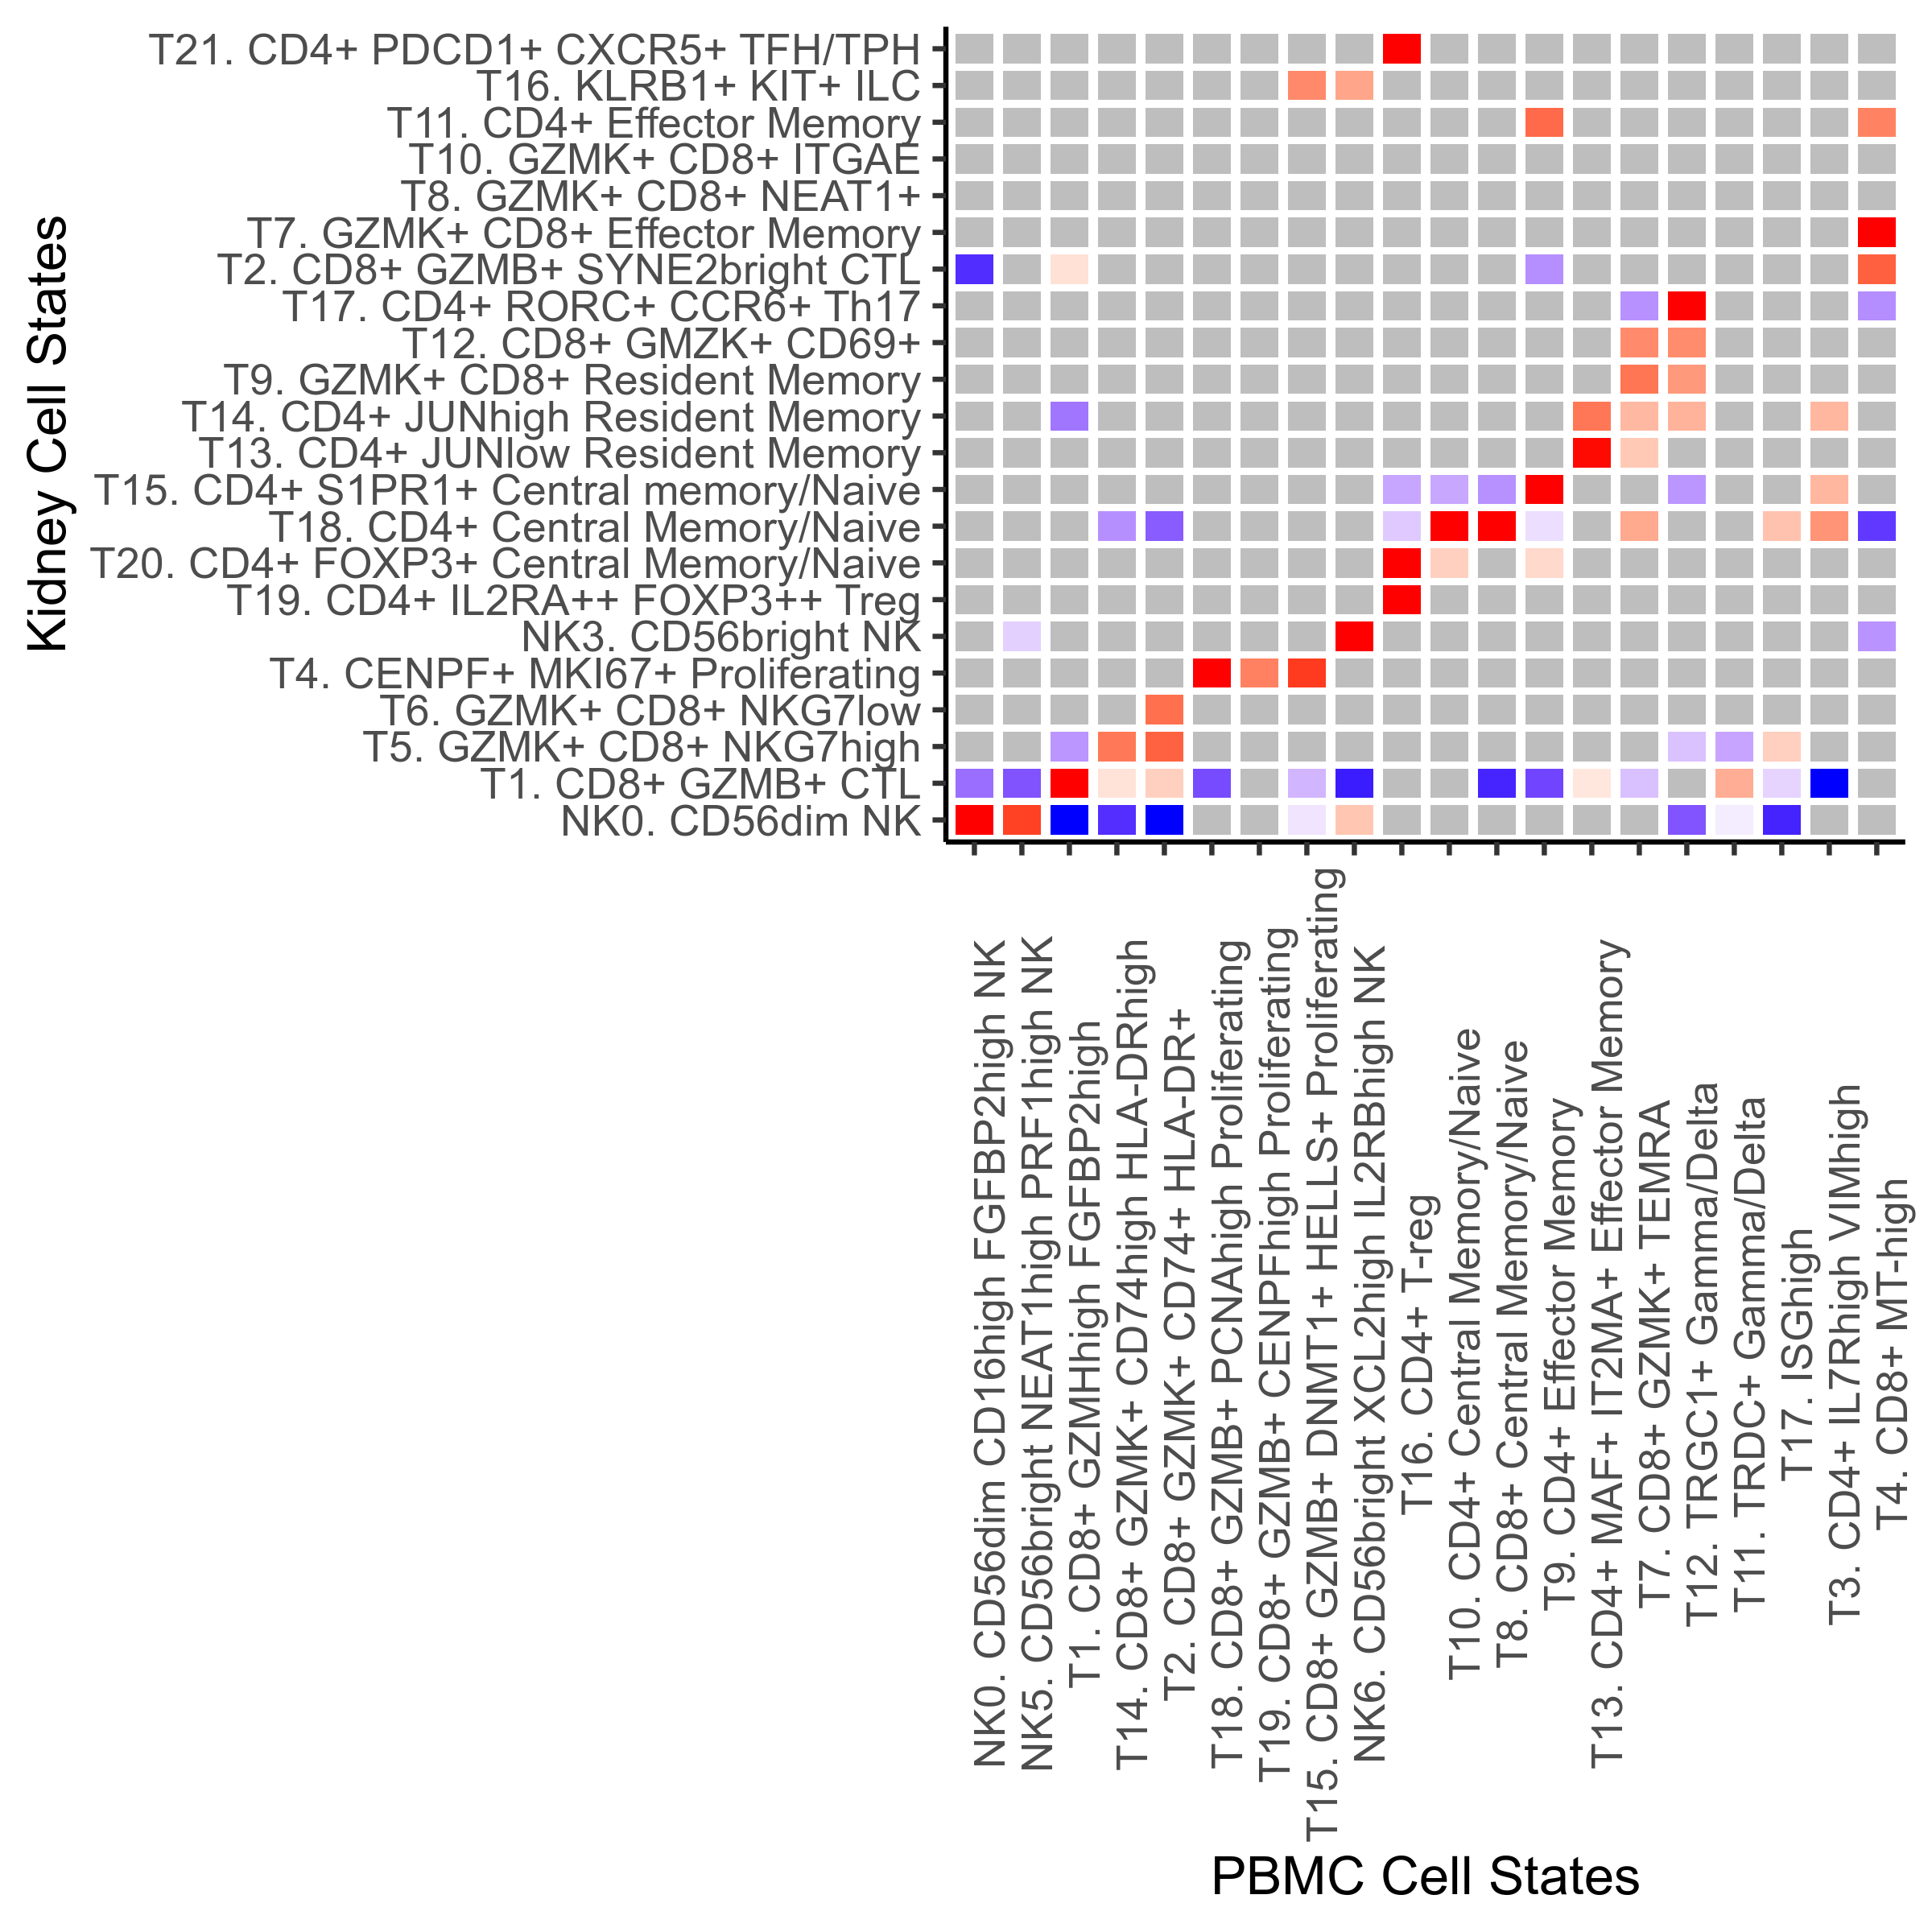

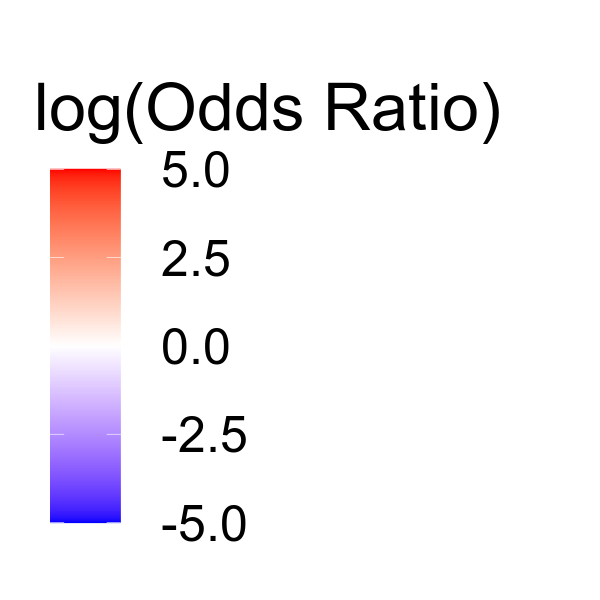

In [35]:
options(warn=-1)
p1 <- ggplot(or_stats, 
       aes(y = cell_type_pred_knn, 
           x = annotation, 
           fill = as.numeric(log_OR))) + 
   geom_tile(height = 0.8, width = 0.8) + 
    scale_fill_gradient2(low = "blue", mid = "white", high = "red", 
                          na.value = "grey",
                          name = "log(Odds Ratio)", 
                         limits = c(-5, 5),
                         oob = scales::squish) +  
    theme_classic(base_size = 40) + 
    theme(legend.text = element_text(size = 30),
          legend.title = element_text(hjust = -0.5),
          axis.text.x = element_text(angle = 90)) +
    scale_x_discrete(limits = x_order) + 
    scale_y_discrete(limits = y_order) + 
    labs(x = "PBMC Cell States", y = "Kidney Cell States") + 
    theme(legend.key.size = unit(1.5, "cm"),
          legend.position = "right") +
    theme(text=element_text(family="Arial")) 
legend <- cowplot::get_legend(p1)
p1 <- p1 + theme(legend.position = "none")
legend <- cowplot::plot_grid(legend)
cowplot::save_plot("/data/srlab/ssg34/SLE_kidney_v2/figures/main_figures/figure7/figure7c.png",
       p1,
       base_height = 20,
       base_width = 20)
cowplot::save_plot("/data/srlab/ssg34/SLE_kidney_v2/figures/main_figures/figure7/figure7c-legend.png",
       legend,
       base_height = 5,
       base_width = 5)
fig.size(20,20)
p1
fig.size(5, 5)
legend
options(warn=0)

# MYELOID CELLS

In [36]:
myeloid_reference <- readRDS('/data/srlab/ssg34/SLE_kidney_v2/data/symphony_materials/myeloid_kidney_symphony_reference_07162024.rds') 
SLE_myeloid_norm <- readRDS('/data/srlab/ssg34/SLE_pbmc_analysis/data/gene_expression/mono_dc_qcd_seurat_sc_analysis_08252023.rds')[['RNA']]@data
SLE_myeloid_meta <- readRDS('/data/srlab/ssg34/SLE_kidney_v2/data/pbmc/SLE_mono_dc_pbmc_metadata_filtered_V0_cases_controls_07182024.rds')
SLE_myeloid_norm <- SLE_myeloid_norm[, SLE_myeloid_meta$Cell]

In [37]:
myeloid_query_meta <- SLE_myeloid_meta[sample(nrow(SLE_myeloid_meta), 20000), ]
myeloid_query_norm <- SLE_myeloid_norm[, myeloid_query_meta$Cell]

In [38]:
final_annotation <- data.frame(new_cluster_number = seq(0, 20), 
                                           final_annotation = c('M0. CD16+ CXC3CR1+ Monocyte', 
                                                               'M1. CD14+ CD16+ CCL2+ CX3CR1+ Monocyte',
                                                               'M2. CD14+ CCR2+ Monocyte',
                                                               'M3. CCL2+ CCL3+ Monocyte',
                                                               'M4. TPSB2+ MAST cell',
                                                               'M5. GPNMBhigh NUPR1high Macrophage',
                                                               'M6. SELENOPinter ISGhigh Macrophage', 
                                                               'M7. SPP1high FABP5high Macrophage',
                                                               'M8. SPP1low FABP5high Macrophage',
                                                               'M9. MERTKhigh FABP5high Macrophage',
                                                               'M10. SELENOPinter LYVE1inter Resident Macrophage',
                                                               'M11. GPMNBhigh NUPR1low Macrophage',
                                                               'M12. SELENOPhigh LYVE1high Resident Macrophage',
                                                               'DC13. CCR7+ LAMP3+ DC2', 
                                                               'M14. APOChigh C3high Macrophage',
                                                               'DC15. CLEC10Alow cDC2',
                                                               'M16. APOClow C3high Macrophage',
                                                               'DC17. CLEC10Ahigh cDC2',
                                                               'M18. CENPF+ MKI67+ Proliferating',
                                                               'DC19. cDC1',
                                                               'DC20. pDC'))
myeloid_reference$meta_data <- myeloid_reference$meta_data %>% left_join(final_annotation)

Joining, by = "new_cluster_number"


In [39]:
annotations <- data.frame(RNA_snn_res.0.75 = as.character(seq(0, 12)),
                          annotation = c("M0. CD14+ CD16- S100Ahigh", 
                                         "M1. CD14+ CD16- CXCL8+",
                                         "M2. CD14+ CD16- CCR2high",
                                         "M3. CD16++ CD14dim CDKN1C+",
                                         "M4. CD14+ CD16+ MHC2higher",
                                         "M5. CD14+ CD16- LGALS2+",
                                         "DC6. CLEC10A+ CD1C+ DC2",
                                         "M7. CD14+ CD16- ISGhigh", 
                                         "P8. PPBP+ GP1BB+ Platelet",
                                         "DC9. TCF4+ CLEC4C+ pDC",
                                         "M10. MThigh",
                                         "M11. CD14+ CD16+ MHC2lower",
                                         "DC12. CLEC9A+ XCR1+ DC1"))

In [40]:
query = mapQuery(myeloid_query_norm,             # query gene expression (genes x cells)
                   myeloid_query_meta,        # query metadata (cells x attributes)
                   myeloid_reference,             # Symphony reference object
                   do_normalize = FALSE,  # perform log(CP10k+1) normalization on query
                   do_umap = FALSE)        # project query cells into reference UMAP

Scaling and synchronizing query gene expression

Found 4790 out of 4790 reference variable genes in query dataset

Project query cells using reference gene loadings

Clustering query cells to reference centroids

Correcting query batch effects

All done!



In [41]:
query = knnPredict(query, myeloid_reference, myeloid_reference$meta_data$final_annotation, k = 10)

In [42]:
query_meta <- query$meta_data %>% filter(cell_type_pred_knn_prob >= 0.8)
freq_table <- data.frame(table(query_meta$cell_type_pred_knn, query_meta$annotation))
colnames(freq_table) <- c("cell_type_pred_knn", "annotation", "Freq")
freq_table <- freq_table %>% mutate(cell_type_pred_knn = as.character(cell_type_pred_knn),
                                    annotation = as.character(annotation))

In [58]:
or_stats <- run_or(freq_table) 
or_stats <- or_stats %>% mutate(log_OR = ifelse(as.numeric(pvalue) < 0.01, log_OR, NA))

Warning message in chisq.test(contin, correct = TRUE):
“Chi-squared approximation may be incorrect”
Warning message in chisq.test(contin, correct = TRUE):
“Chi-squared approximation may be incorrect”
Warning message in chisq.test(contin, correct = TRUE):
“Chi-squared approximation may be incorrect”
Warning message in chisq.test(contin, correct = TRUE):
“Chi-squared approximation may be incorrect”
Warning message in chisq.test(contin, correct = TRUE):
“Chi-squared approximation may be incorrect”
Warning message in chisq.test(contin, correct = TRUE):
“Chi-squared approximation may be incorrect”
Warning message in chisq.test(contin, correct = TRUE):
“Chi-squared approximation may be incorrect”
Warning message in chisq.test(contin, correct = TRUE):
“Chi-squared approximation may be incorrect”
Warning message in chisq.test(contin, correct = TRUE):
“Chi-squared approximation may be incorrect”
Warning message in chisq.test(contin, correct = TRUE):
“Chi-squared approximation may be incorrect”


In [48]:
y_order <- c(
    'M1. CD14+ CD16+ CCL2+ CX3CR1+ Monocyte',
    'M3. CCL2+ CCL3+ Monocyte',
    'M2. CD14+ CCR2+ Monocyte',
    'DC17. CLEC10Ahigh cDC2',
    'DC13. CCR7+ LAMP3+ DC2',
    'M0. CD16+ CXC3CR1+ Monocyte',
    'DC15. CLEC10Alow cDC2',
    'DC19. cDC1',
    'DC20. pDC',
    'M4. TPSB2+ MAST cell',
    'M11. GPMNBhigh NUPR1low Macrophage',
    'M9. MERTKhigh FABP5high Macrophage',
    'M7. SPP1high FABP5high Macrophage',
    'M8. SPP1low FABP5high Macrophage',
    'M10. SELENOPinter LYVE1inter Resident Macrophage',
    'M12. SELENOPhigh LYVE1high Resident Macrophage',
    'M5. GPNMBhigh NUPR1high Macrophage'
)
y_order <- c(y_order, final_annotation$final_annotation[!final_annotation$final_annotation %in% y_order])

In [49]:
x_order <- c(
    'M1. CD14+ CD16- CXCL8+',
    'M0. CD14+ CD16- S100Ahigh',
    'M2. CD14+ CD16- CCR2high',
    'M5. CD14+ CD16- LGALS2+',
    'M7. CD14+ CD16- ISGhigh',
    'M11. CD14+ CD16+ MHC2lower',
    'DC6. CLEC10A+ CD1C+ DC2',
    'DC12. CLEC9A+ XCR1+ DC1',
    'M3. CD16++ CD14dim CDKN1C+',
    'M4. CD14+ CD16+ MHC2higher',
    'DC9. TCF4+ CLEC4C+ pDC',
    'M10. MThigh',
    'P8. PPBP+ GP1BB+ Platelet'
)

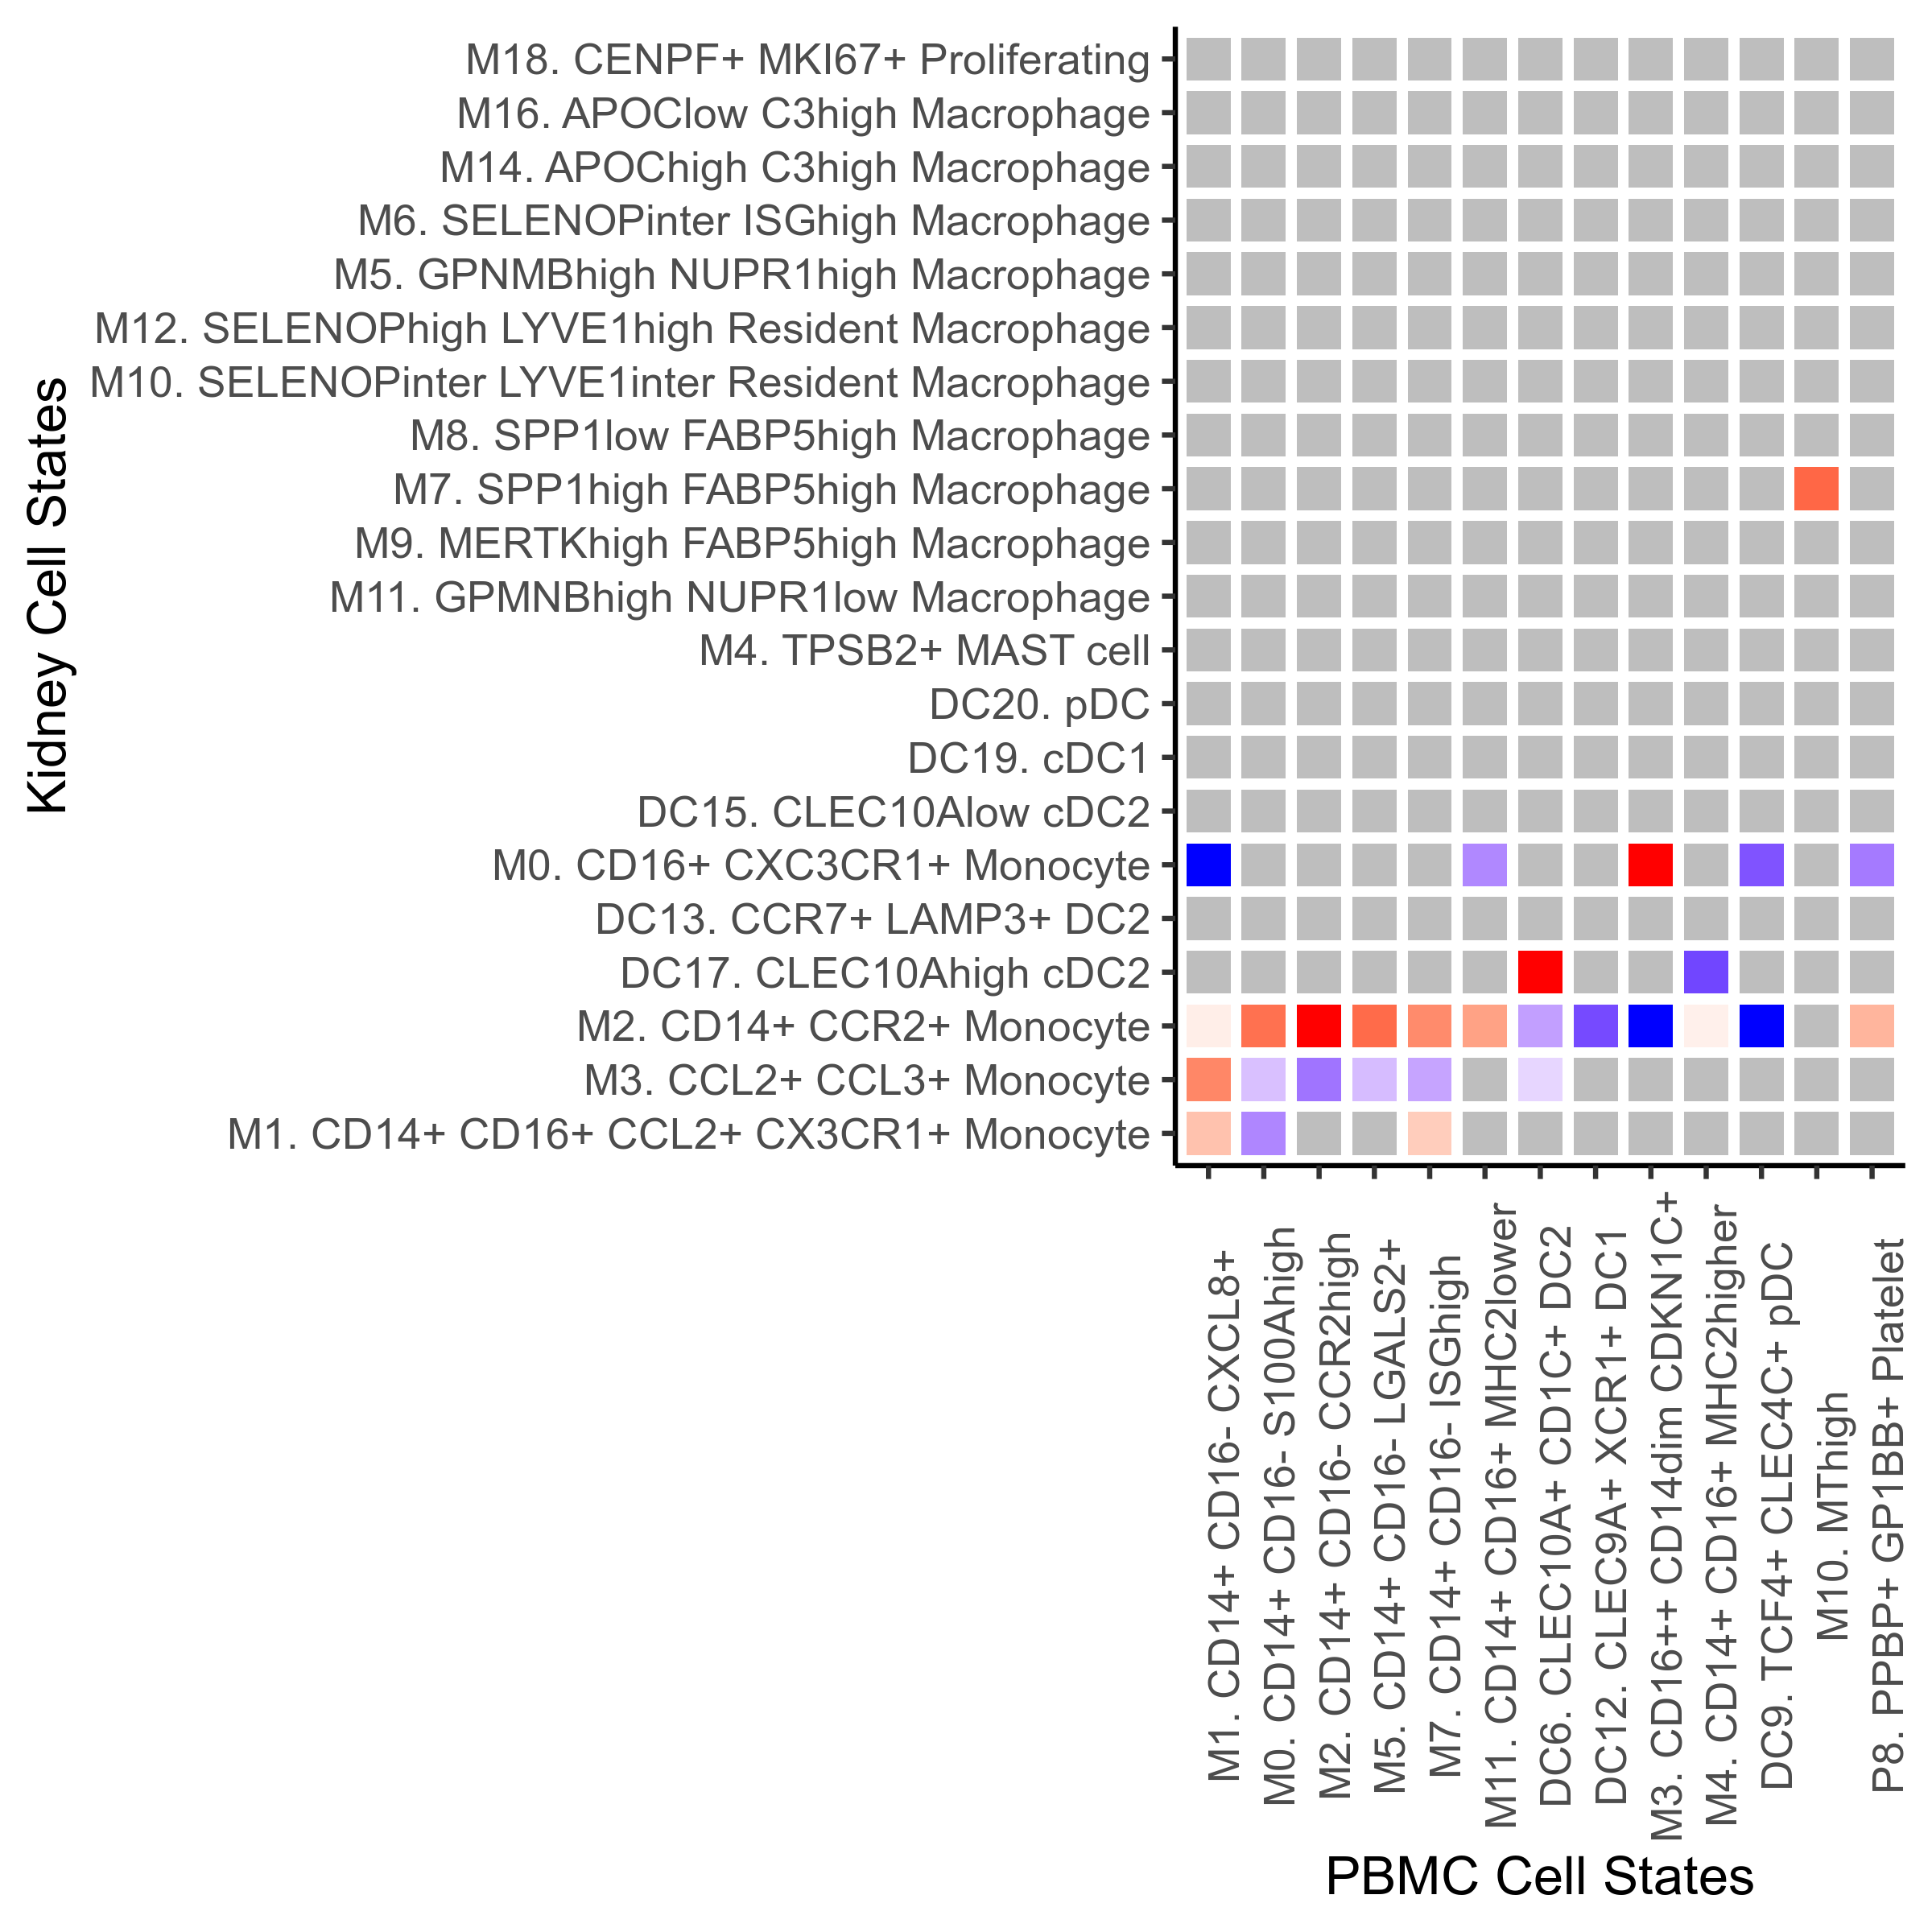

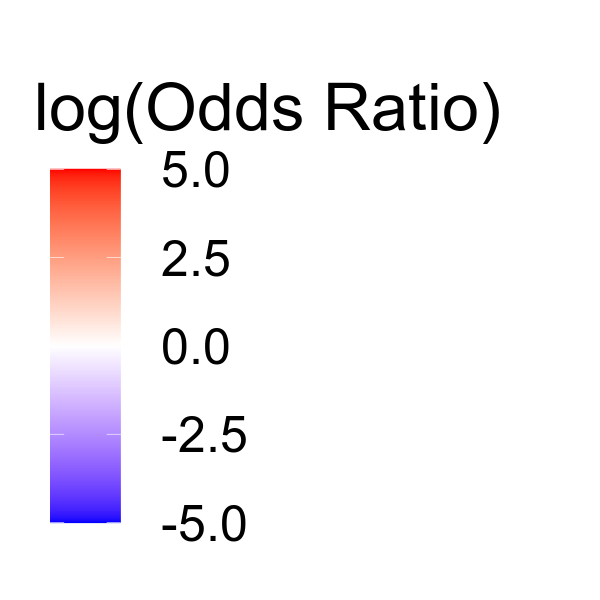

In [59]:
options(warn=-1)
p <- ggplot(or_stats, 
       aes(y = cell_type_pred_knn, 
           x = annotation, 
           fill = as.numeric(log_OR))) + 
    geom_tile(height = 0.8, width = 0.8) + 
        scale_fill_gradient2(low = "blue", mid = "white", high = "red", 
                          na.value = "grey",
                          name = "log(Odds Ratio)", 
                         limits = c(-5, 5),
                         oob = scales::squish) +  
    theme_classic(base_size = 40) + 
    theme(legend.text = element_text(size = 30),
          legend.title = element_text(hjust = -0.5),
          axis.text.x = element_text(angle = 90)) +
    scale_x_discrete(limits = x_order) + 
    scale_y_discrete(limits = y_order) + 
    labs(x = "PBMC Cell States", y = "Kidney Cell States") + 
    theme(legend.key.size = unit(1.5, "cm"),
          legend.position = "right") +
    theme(text=element_text(family="Arial"))
legend <- cowplot::get_legend(p)
p <- p + theme(legend.position = "none")
legend <- cowplot::plot_grid(legend)
cowplot::save_plot("/data/srlab/ssg34/SLE_kidney_v2/figures/main_figures/figure7/figure7f.png",
       p,
       base_height = 20,
       base_width = 20)
cowplot::save_plot("/data/srlab/ssg34/SLE_kidney_v2/figures/main_figures/figure7/figure7f-legend.png",
       legend,
       base_height = 5,
       base_width = 5)
fig.size(20, 20)
p
fig.size(5, 5)
legend
options(warn=0)

# B Cells

In [59]:
b_reference <- readRDS('/data/srlab/ssg34/SLE_kidney_v2/data/symphony_materials/bp_kidney_symphony_referece_07162024.rds')
SLE_bcell_norm <- readRDS('/data/srlab/ssg34/SLE_pbmc_analysis/data/gene_expression/b_cell_qcd_seurat_sc_analysis_08252023.rds')[['RNA']]@data
SLE_bcell_meta <- readRDS('/data/srlab/ssg34/SLE_kidney_v2/data/pbmc/SLE_b_cell_pbmc_metadata_filtered_V0_cases_controls_07182024.rds')
SLE_bcell_norm <- SLE_bcell_norm[, SLE_bcell_meta$Cell]

In [119]:
bcell_query_meta <- SLE_bcell_meta[sample(nrow(SLE_bcell_meta), 10000), ]
bcell_query_norm <- SLE_bcell_norm[, bcell_query_meta$Cell]

In [179]:
query = mapQuery(SLE_bcell_norm,             # query gene expression (genes x cells)
                   SLE_bcell_meta,        # query metadata (cells x attributes)
                   b_reference,             # Symphony reference object
                   do_normalize = FALSE,  # perform log(CP10k+1) normalization on query
                   do_umap = FALSE)        # project query cells into reference UMAP

Scaling and synchronizing query gene expression

Found 2761 out of 2761 reference variable genes in query dataset

Project query cells using reference gene loadings

Clustering query cells to reference centroids

Correcting query batch effects

All done!



In [180]:
annotations <- data.frame(RNA_snn_res.0.25 = as.character(seq(0, 8)),
                          annotation = c("B0. CXCR5high Naive",
                                         "B1. CRIP1+ Mature",
                                         "B2. FCRL5+ ITGAX+ ABC",
                                         "B3. CD79A+ VREPB3+ pre B Cell",
                                         "B4. ISGhigh Naive",
                                         "B5. MThigh",
                                         "B6. JUN+ NFKB1+ Activated",
                                         "B7. IGKC+ XBP1+ Plasma-like", 
                                         "B8. FCRL5+ IGHG1+ B Cell"))
#query$meta_data <- query$meta_data %>% left_join(annotations)

In [181]:
final_annotations <- data.frame(new_cluster_number = seq(0, 11),
                                           final_annotation = c("B0. FOXO1+ BCL6+ GC",
                                                                "B1. CD28+ IGM- activated B Cell",
                                                                "B2. IGHD+ FCER2+ Naïve B Cell",
                                                                "B3. BCL2+ CD27+ MCL1+ Unswitched Memory B Cell",
                                                                "B4. BCL2+ BCL11A+ IGHE+ Memory B Cell",
                                                                "B5. FCRL5+ ITGAX+ TBX21+ ABC-like", 
                                                                "P6. CD38++ MKI67+ Plasmablast",
                                                                "P7. IGG+ IGKC++ IGL- Plasma Cell",
                                                                "P8. IGA+ IGL- Plasma Cell",
                                                                "P9. IGG+ IGKC+ IGL- Plasma Cell",
                                                                "P10. IGA+ IGL+ Plasma Cell",
                                                                "P11. IGG+ IGKC- IGL+ Plasma Cell"))
b_reference$meta_data <- b_reference$meta_data %>% left_join(final_annotations)

Joining, by = c("new_cluster_number", "final_annotation")


In [182]:
query = knnPredict(query, b_reference, b_reference$meta_data$final_annotation, k = 10)

In [183]:
query_meta <- query$meta_data %>% filter(cell_type_pred_knn_prob >= 0.8)
freq_table <- data.frame(table(query_meta$cell_type_pred_knn, query_meta$annotation))
colnames(freq_table) <- c("cell_type_pred_knn", "annotation", "Freq")
freq_table <- freq_table %>% mutate(cell_type_pred_knn = as.character(cell_type_pred_knn),
                                    annotation = as.character(annotation))

In [184]:
or_stats <- run_or(freq_table) 
or_stats <- or_stats %>% mutate(bfpvalue = p.adjust(as.numeric(pvalue), "bonferroni"))
or_stats <- or_stats %>% mutate(log_OR = ifelse(bfpvalue < 0.05, as.numeric(log_OR), NA))

In [193]:
x_order <- c('B0. CXCR5high Naive',
             'B3. CD79A+ VREPB3+ pre B Cell',
             'B4. ISGhigh Naive',
             'B1. CRIP1+ Mature',
             'B6. JUN+ NFKB1+ Activated',
             'B7. IGKC+ XBP1+ Plasma-like',
             'B2. FCRL5+ ITGAX+ ABC',
             'B8. FCRL5+ IGHG1+ B Cell',
             'B5. MThigh'
             )
y_order <- c('B2. IGHD+ FCER2+ Naïve B Cell',
             'B1. CD28+ IGM- activated B Cell',
             'B3. BCL2+ CD27+ MCL1+ Unswitched Memory B Cell',
             'P10. IGA+ IGL+ Plasma Cell',
             'P11. IGG+ IGKC- IGL+ Plasma Cell',
             'B5. FCRL5+ ITGAX+ TBX21+ ABC-like',
             'P6. CD38++ MKI67+ Plasmablast',
             'B4. BCL2+ BCL11A+ IGHE+ Memory B Cell',
             'P8. IGA+ IGL- Plasma Cell',
             'P9. IGG+ IGKC+ IGL- Plasma Cell',
             'B0. FOXO1+ BCL6+ GC',
             'P7. IGG+ IGKC++ IGL- Plasma Cell')
#y_order <- c(y_order, final_annotations$final_annotation[!final_annotations$final_annotation %in% y_order])

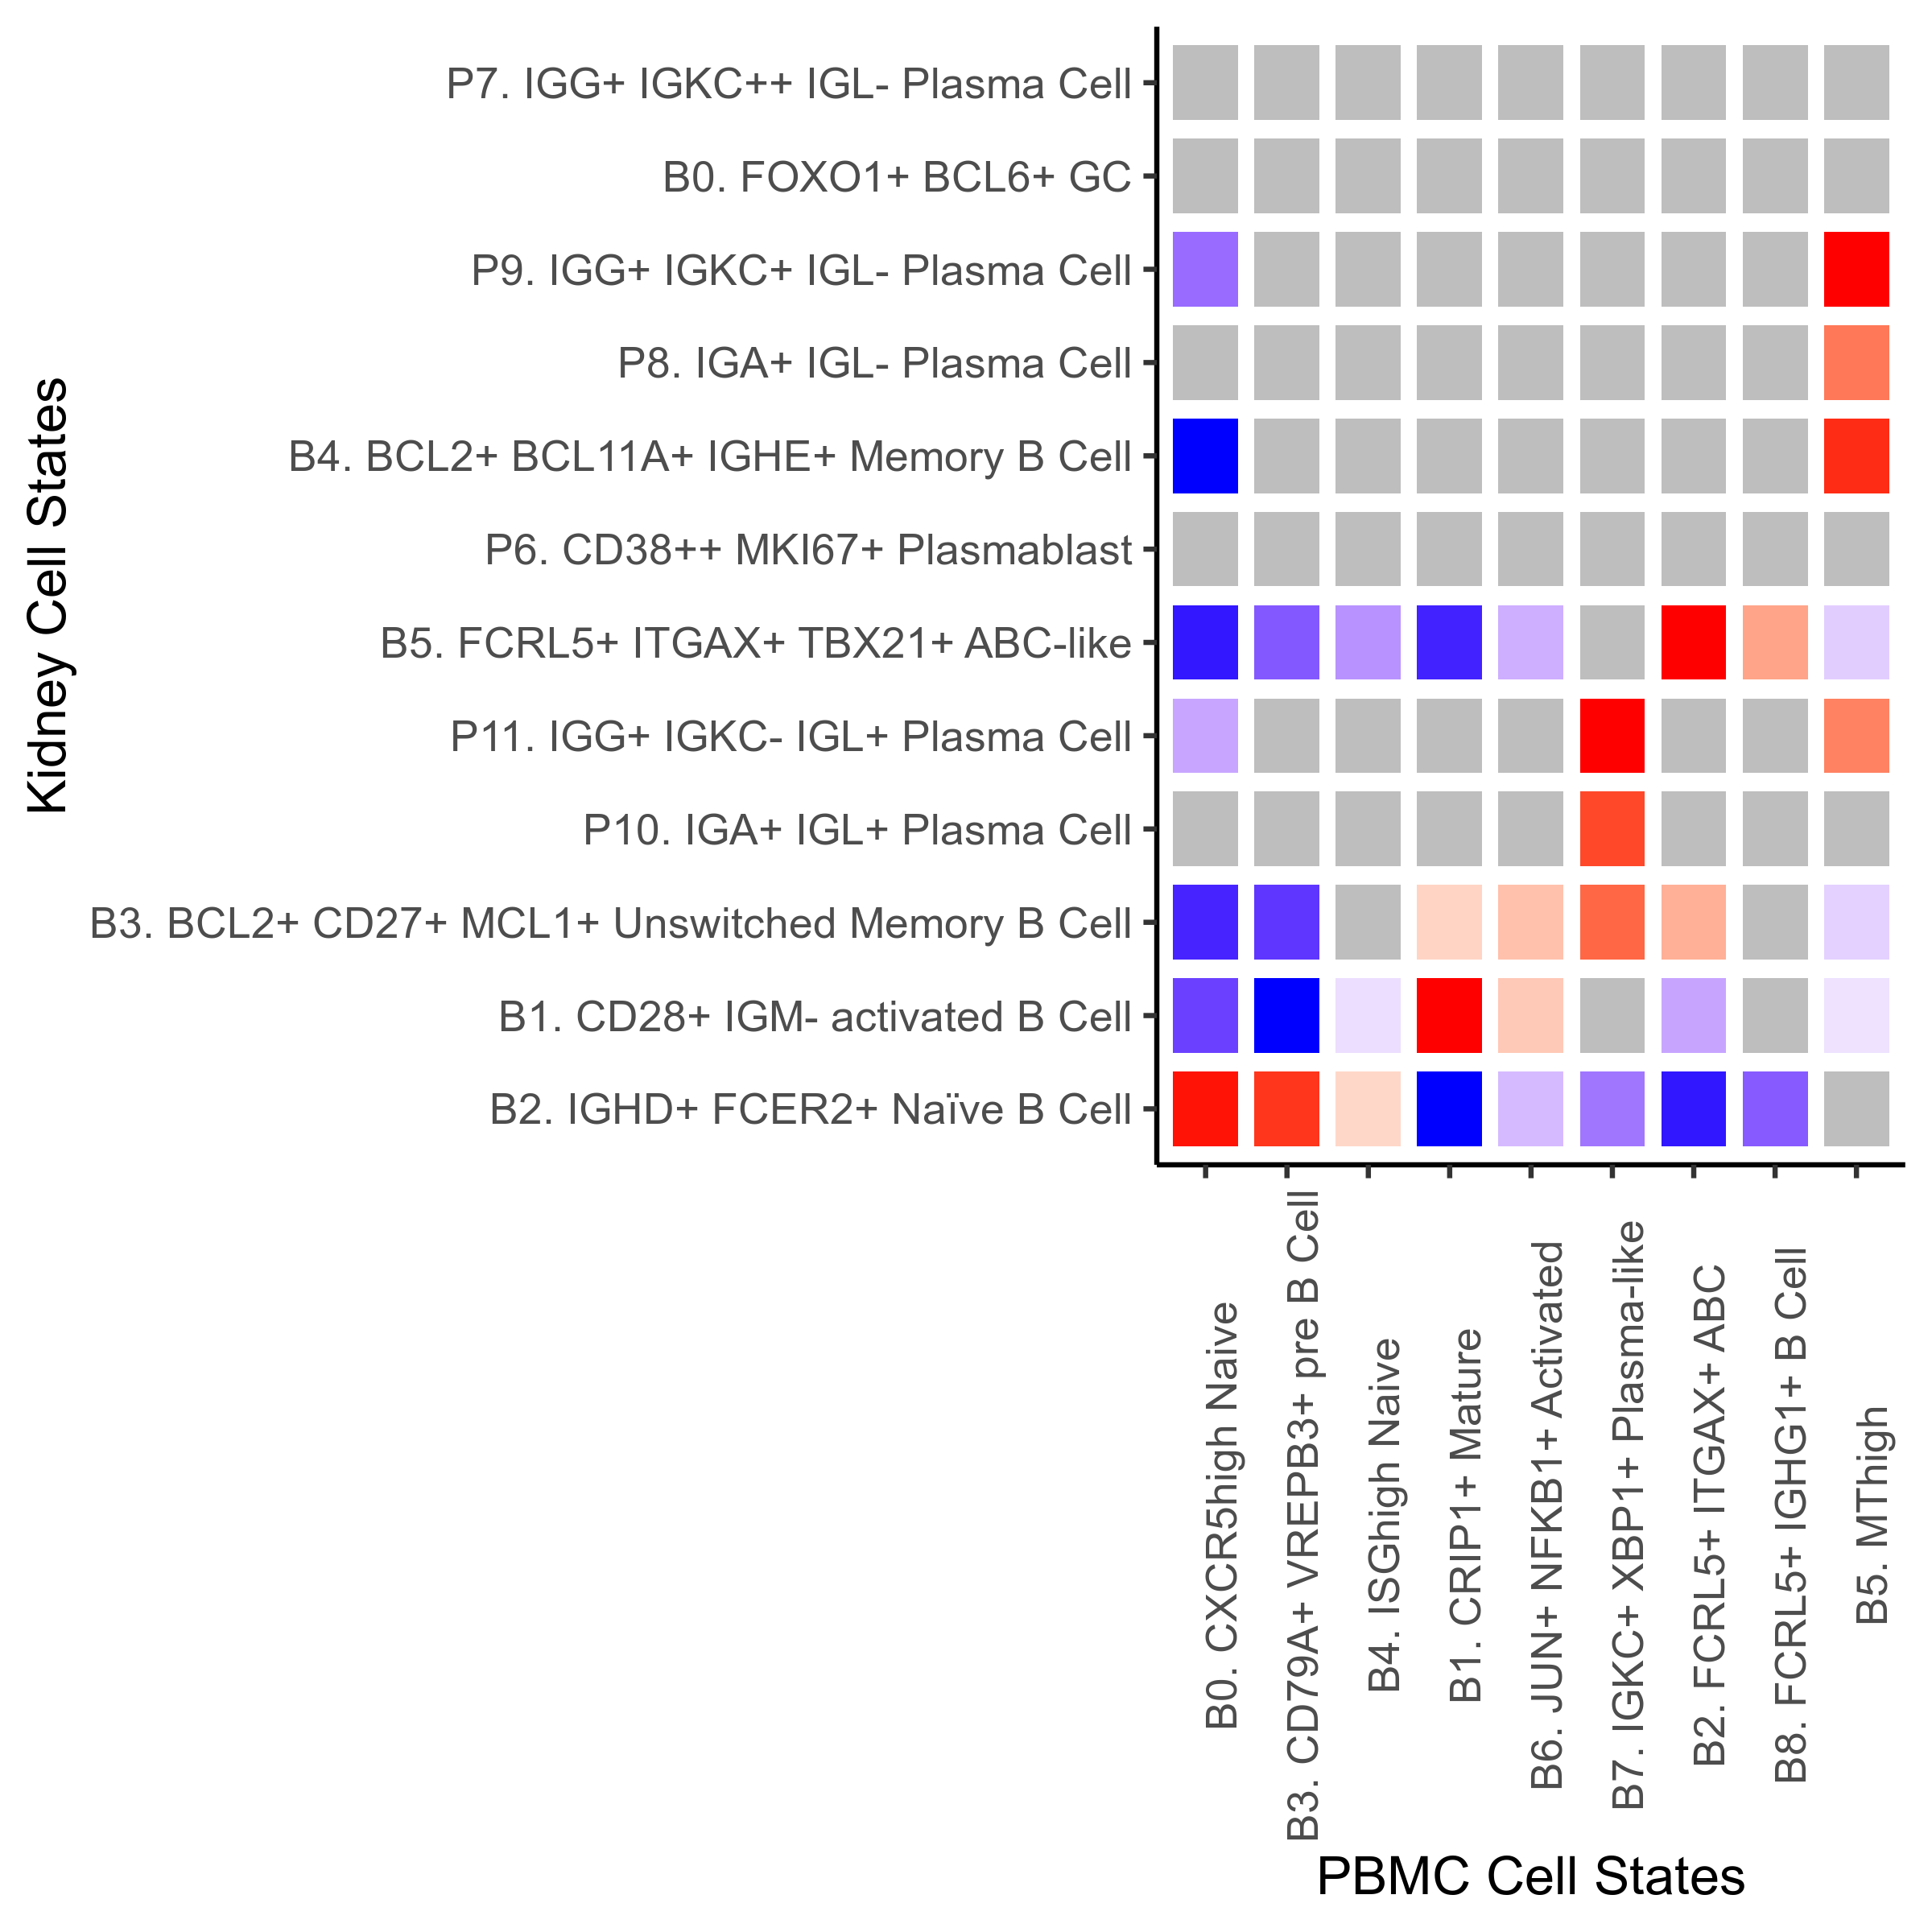

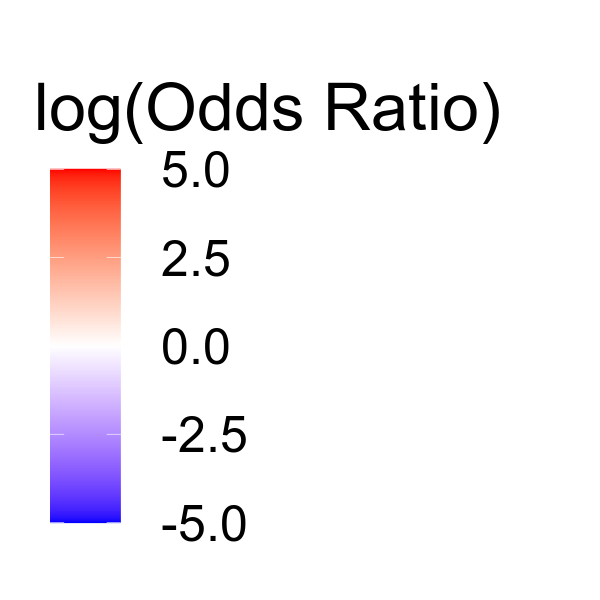

In [194]:
options(warn=-1)
p <- ggplot(or_stats, 
       aes(y = cell_type_pred_knn, 
           x = annotation, 
           fill = as.numeric(log_OR))) + 
    geom_tile(height = 0.8, width = 0.8) + 
        scale_fill_gradient2(low = "blue", mid = "white", high = "red", 
                          na.value = "grey",
                          name = "log(Odds Ratio)", 
                          limits = c(-5, 5),
                          oob = scales::squish) +  
    theme_classic(base_size = 40) + 
    theme(legend.text = element_text(size = 30),
          legend.title = element_text(hjust = -0.5),
          axis.text.x = element_text(angle = 90)) +
    scale_x_discrete(limits = x_order) + 
    scale_y_discrete(limits = y_order) + 
    labs(x = "PBMC Cell States", y = "Kidney Cell States") + 
    theme(legend.key.size = unit(1.5, "cm"),
          legend.position = "right") +
    theme(text=element_text(family="Arial"))
legend <- cowplot::get_legend(p)
p <- p + theme(legend.position = "none")
legend <- cowplot::plot_grid(legend)
cowplot::save_plot("/data/srlab/ssg34/SLE_kidney_v2/figures/main_figures/figure7/figure7d.png",
       p,
       base_height = 20,
       base_width = 20)
cowplot::save_plot("/data/srlab/ssg34/SLE_kidney_v2/figures/main_figures/figure7/figure7d-legend.png",
       legend,
       base_height = 5,
       base_width = 5)
fig.size(20, 20)
p
fig.size(5, 5)
legend
options(warn=0)